In [30]:
import numpy as np
import matplotlib.pyplot as plt
import crank_nicolson_numba.generic as cn
from numba import njit

In [31]:
k = 0.33
I_ast = 21.5
c = 1.0

def D(I):
    if I <= 0:
        return 0.0
    result = c * np.exp(-2*np.power(I_ast/I, (1/(2*k))))
    return result

In [13]:
I_min = 0.0
I_max = 5.0
samples = 2000
I_linspace = np.linspace(I_min, I_max, samples)

In [27]:
I_damp = 4.7

def rho_0(I_linspace):
    return 1 / (1 + np.exp((I_linspace - I_damp)/0.01))

<ipython-input-8-ebba0d05735e>:7: RuntimeWarning: divide by zero encountered in true_divide
  result = c * np.exp(-2*np.power(I_ast/I, (1/(2*k))))


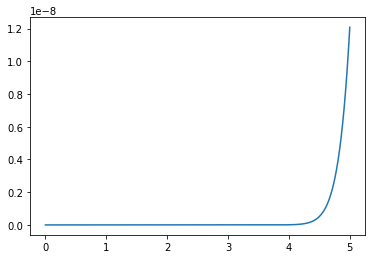

In [25]:
plt.plot(I_linspace, D(I_linspace))

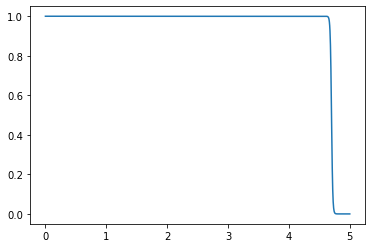

In [28]:
plt.plot(I_linspace, rho_0(I_linspace))

In [65]:
dt_1 = 10000000.0
engine_1 = cn.cn_generic(I_min, I_max, rho_0(I_linspace), dt_1, D)

dt_2 = 100.0
engine_2 = cn.cn_generic(I_min, I_max, rho_0(I_linspace), dt_2, D)

In [66]:
x, stat_0 = engine_1.get_data_with_x()

In [67]:
engine_1.iterate(10)
engine_2.iterate(1000000)
x, stat_1 = engine_1.get_data_with_x()
x, stat_2 = engine_2.get_data_with_x()

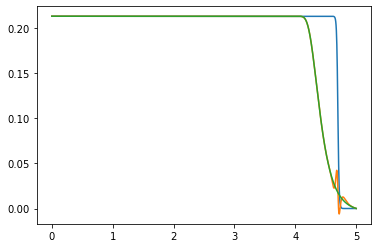

In [68]:
plt.plot(x, stat_0)
plt.plot(x, stat_1)
plt.plot(x, stat_2)

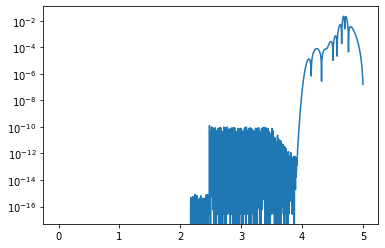

In [69]:
plt.plot(x, np.absolute(stat_1 - stat_2))
plt.yscale("log")

In [64]:
2**64

18446744073709551616